In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from time import sleep

url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url,header=0,  usecols = ['location', 'date', 'total_cases','total_deaths'])
df.head()

,location,date,total_cases,total_deaths
0,Afghanistan,2019-12-31,0.0,0.0
1,Afghanistan,2020-01-01,0.0,0.0
2,Afghanistan,2020-01-02,0.0,0.0
3,Afghanistan,2020-01-03,0.0,0.0
4,Afghanistan,2020-01-04,0.0,0.0


In [2]:
df_countries=df[df.location!='World']
df_countries = df_countries.groupby(['date','location']).agg({'total_cases':np.sum, 'total_deaths':np.sum})
print(df_countries)



                           total_cases  total_deaths
date       location                                 
2019-12-31 Afghanistan             0.0           0.0
           Algeria                 0.0           0.0
           Armenia                 0.0           0.0
           Australia               0.0           0.0
           Austria                 0.0           0.0
...                                ...           ...
2020-08-08 Vietnam               789.0          10.0
           Western Sahara        766.0           1.0
           Yemen                1796.0         512.0
           Zambia               7486.0         200.0
           Zimbabwe             4451.0         102.0

[35285 rows x 2 columns]


In [3]:
df_countries = df_countries.groupby(['date']).apply(lambda x: x.nlargest(10, 'total_cases')[['total_cases','total_deaths']]).reset_index(level=1,drop=True)
print(df_countries)

                        total_cases  total_deaths
date       location                              
2019-12-31 China               27.0           0.0
           Afghanistan          0.0           0.0
           Algeria              0.0           0.0
           Armenia              0.0           0.0
           Australia            0.0           0.0
...                             ...           ...
2020-08-08 Mexico          469407.0       51311.0
           Peru            463875.0       20649.0
           Chile           368825.0        9958.0
           Colombia        367196.0       12250.0
           Iran            322567.0       18132.0

[2220 rows x 2 columns]


In [4]:
 print(df_countries.loc['2019-12-31','total_deaths'].values)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
list_dates = sorted(list(df['date'].unique()))

print(list_dates)

['2019-12-31', '2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12', '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020

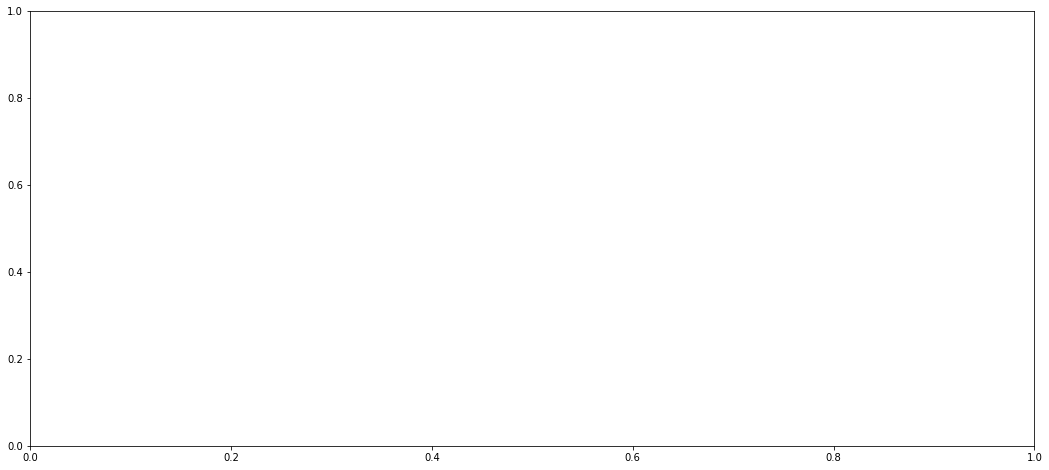

In [6]:
fig, ax = plt.subplots(figsize=(18, 8))


In [7]:

countries = df['location'].unique()  #Countries can be repeated on different Dates
cmap = plt.get_cmap('tab20')
cmap2 = plt.get_cmap('tab20b')
colors = cmap(np.linspace(0, 1, len(countries)))
colors2 = cmap2(np.linspace(0, 1, len(countries)))
color_dict = dict(zip(countries,colors))
color2_dict = dict(zip(countries,colors2))

In [8]:
   
def update(some_date):

    ax.clear()
   
    xvals = df_countries.loc[some_date].index
    data_total_cases = list(map(int, df_countries.loc[some_date, 'total_cases'].values))
    data_death_count = list(map(int, df_countries.loc[some_date, 'total_deaths'].values))
    

   # print(xvals,data)  
    sleep(0.3)  # To slow down the animation

    ax.set_title(f'Cumulative Confirmed COVID-19 Cases\n {some_date}',fontsize=15)
    ax.invert_yaxis()
    for spine in ax.spines.values():
        spine.set_visible(False)
    # Removing Tickmarks and values in X-axis
    ax.tick_params(left=False, bottom=False, labelbottom=False)
    
    bars_total=ax.barh(xvals, data_total_cases , color=[color_dict[country] for country in xvals])
    bars_death_count=ax.barh(xvals, data_death_count , color=[color2_dict[country] for country in xvals])
    
    for bar in bars_total:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, '  ' + str(bar.get_width()), va='center')
    for bar in bars_death_count:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, '  ' + str(bar.get_width()), va='center')

In [9]:
#test_dates=['2020-06-18', '2020-06-19', '2020-06-20', '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12', '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25', '2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06', '2020-08-07', '2020-08-08']
my_anim = animation.FuncAnimation(fig = fig, func = update,
                    frames= list_dates, blit=False,
                    interval=30, repeat=False)

In [10]:
path_mp4 = 'covid2.mp4' 
my_anim.save(filename = path_mp4, writer = 'ffmpeg',
             fps=15,
             extra_args= ['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])


In [11]:
df2 = pd.read_csv(url,header=0,  usecols = ['location', 'date', 'total_cases', 'total_deaths'])
df_world_count=df2[df2.location =='World']
df_world_count.index = pd.to_datetime(df_world_count.date)
df_world_count = df_world_count.drop(columns=['location','date'])

print(df_world_count)

            total_cases  total_deaths
date                                 
2019-12-31         27.0           0.0
2020-01-01         27.0           0.0
2020-01-02         27.0           0.0
2020-01-03         44.0           0.0
2020-01-04         44.0           0.0
...                 ...           ...
2020-08-04   18270347.0      693733.0
2020-08-05   18524006.0      700544.0
2020-08-06   18798855.0      707716.0
2020-08-07   19082952.0      714626.0
2020-08-08   19357085.0      721174.0

[222 rows x 2 columns]


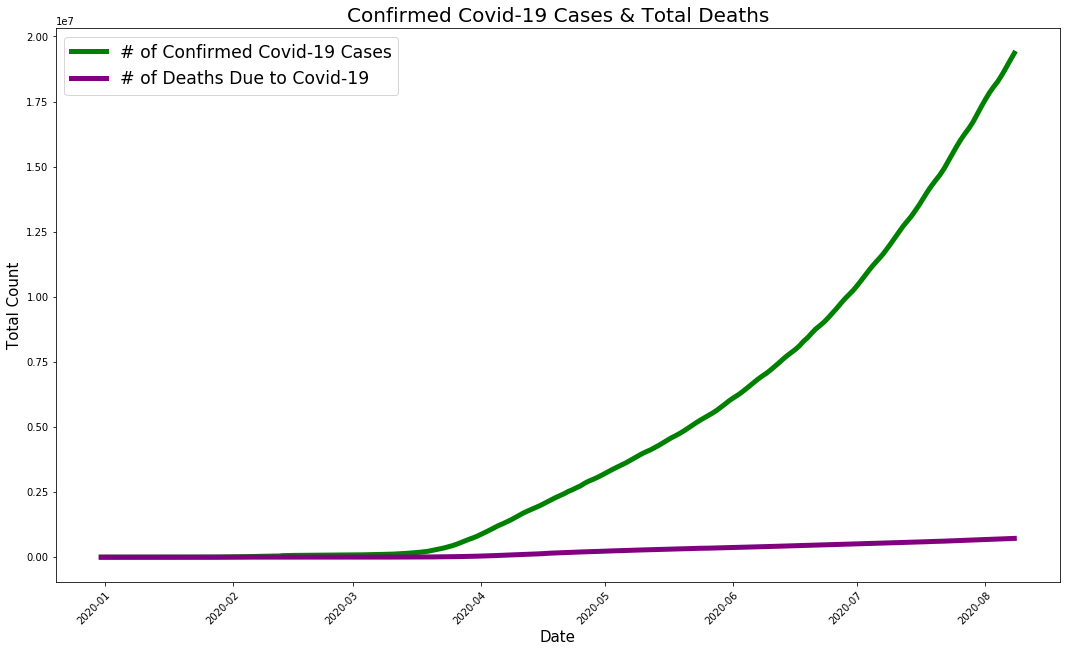

In [16]:

fig, ax = plt.subplots(figsize=(18, 11))

x = df_world_count.index
y = df_world_count.total_cases
z = df_world_count.total_deaths
line1, = ax.plot(x, y, color = "green", linewidth=5, label="# of Confirmed Covid-19 Cases")
line2, = ax.plot(x, z, color = "purple", linewidth=5, label="# of Deaths Due to Covid-19")
plt.xticks(rotation=45, ha="right", rotation_mode="anchor") #rotate the x-axis values
plt.subplots_adjust(bottom = 0.2, top = 0.9) #ensuring the dates (on the x-axis) fit in the screen
plt.ylabel('Total Count',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.title('Confirmed Covid-19 Cases & Total Deaths',fontsize=20)
plt.legend(loc="upper left", fontsize='xx-large')

In [20]:
print(y[:4])


date
2019-12-31    27.0
2020-01-01    27.0
2020-01-02    27.0
2020-01-03    44.0
Name: total_cases, dtype: float64


In [21]:
def line_chart(num, x, y, z, line1, line2):

    plt.legend(df_world_count.columns)
    line1.set_data(x[:num], y[:num])
    line2.set_data(x[:num], z[:num])
    return [line1,line2]

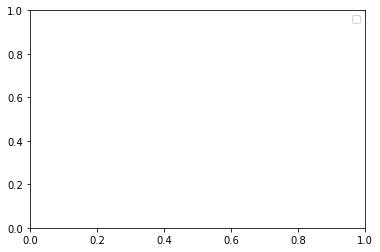

In [22]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

animator = animation.FuncAnimation(fig = fig, func = line_chart, 
                                   fargs=[x, y, z, line1, line2], 
                                   frames= range(len(list_dates)), blit=False)

path_mp4 = 'covid_world.mp4' 
animator.save(path_mp4, writer=writer)
plt.show()